In [2]:
from src.syntheticdata.processor import FactoryLoader, datasets

for k, v in datasets.items():
    print(f"Available datasets: {k}: {v}")

fl = FactoryLoader(datasets['av-redscience'])

fl.factories

Available datasets: av-redscience: raw/txt/av
Available datasets: factorio-tech-json: raw/json/factorio-tech
Available datasets: factorio-tech: raw/csv/factorio-tech
Available datasets: factorio-codex: raw/csv/factorio-codex
Available datasets: idan: raw/csv/idan_blueprints.csv


{'Red Science Factories-0': Factory(json={'blueprint': {'icons': [{'signal': {'type': 'item', 'name': 'electronic-circuit'}, 'index': 1}, {'signal': {'type': 'item', 'name': 'assembling-machine-1'}, 'index': 2}], 'entities': [{'entity_number': 1, 'name': 'transport-belt', 'position': {'x': 61.5, 'y': 49.5}, 'direction': 2}, {'entity_number': 2, 'name': 'transport-belt', 'position': {'x': 60.5, 'y': 49.5}, 'direction': 2}, {'entity_number': 3, 'name': 'transport-belt', 'position': {'x': 62.5, 'y': 49.5}, 'direction': 2}, {'entity_number': 4, 'name': 'underground-belt', 'position': {'x': 63.5, 'y': 49.5}, 'direction': 2, 'type': 'input'}, {'entity_number': 5, 'name': 'transport-belt', 'position': {'x': 65.5, 'y': 49.5}, 'direction': 2}, {'entity_number': 6, 'name': 'transport-belt', 'position': {'x': 64.5, 'y': 49.5}, 'direction': 2}, {'entity_number': 7, 'name': 'transport-belt', 'position': {'x': 67.5, 'y': 48.5}, 'direction': 2}, {'entity_number': 8, 'name': 'transport-belt', 'positio

In [ ]:
from src.syntheticdata.processor import FactoryLoader, datasets

for k, v in datasets.items():
    fl = FactoryLoader(v)
    i = len(list(fl))
    print(f"Count for {k}: {i} blueprints.")


Count for factorio-tech: 2742 blueprints.
Count for factorio-codex: 713 blueprints.
Count for idan: 2256 blueprints.


In [5]:
from src.pipeline.loaders import FactoryLoader, RecipeWhitelist, Whitelist, Blacklist, Required
from src.syntheticdata.processor import datasets

fl = FactoryLoader(datasets['factorio-tech'])
# banned = Blacklist(['pipe', 'beacon'])
allowed = RecipeWhitelist(['assembling-machine-1', 'transport-belt', 'inserter', 'small-electric-pole',
                           'iron-gear-wheel', 'electronic-circuit', 'automation-science',
                           'steel-chest', 'iron-chest', 'wooden-chest', 'copper-cable'])
banned = Blacklist(['pipe', 'pipe-to-ground', 'storage-tank', 'electric-mining-drill', 'logistic-chest-requester',
                    'straight-rail', 'solar-panel', 'express-transport-belt', 'constant-combinator',
                    'ghost-scanner'])
requires_assembler = Required(['assembling-machine-1', 'assembling-machine-2', 'assembling-machine-3'])
requires_inserter = Required(['inserter', 'fast-inserter', 'bulk-inserter', 'long-armed-inserter'])

transform_list = [allowed, banned, requires_assembler, requires_inserter]

iters = fl
for sieve in transform_list:
    iters = filter(sieve, iters)

lll = list(iters)

In [15]:
print(
    lll[2].blueprint.to_string()
)

0eNqtXdtuHLmS/BVDL/vSnuUlk5d53H3Zf9gzONB4NDMCZFmQ5N0dDPzvWy3L3S53ZlVG6DwIBgwpKplMksFkMPn31a93n28eHm/vn69+/vvq9vnm49XP3/3f4eru+tebu+X//uv64eGvf364fs7/9vTuw+3jh7ubl38+3z4/Lb/2283Th8fbh+fbT/fLL//HX+8+//ufp7/4x/0/7v/z+v7d77fP7z7+9e7p483d8+39H++ebp4/P7y7fnr3vzd3dz8tKLcfPt0/Xf38339fPd3+cX99d7Tp/vrjzQL5/Hh9//Tw6fH5/WLP89WX5Zfvf7v5v6uf85eD8evXT083H3+9W77y/uP1hz9v72/e5+/+qJh/dHN38+H58dP97Yf3r0377k/ql18OV/9z8/j00sQysvRZuuRU+pDD1c398+3z7c1X61/xfr9+en5/e/908/h887g07+HT0+1XD/19dTSi/KSHq7+WJvykX14R/vrn/eePvy6//bVdduMvkfIrUnpB+u32cWnIVzsvcAuDa1pYEaQSt1C+w91xoWy6UAEDxTWwXeA2BLfGcTuDa7Z8fIf09PH67u7919heIvvh093NJVxur3D1Be7+5vaPP3/99PnxGM95Hpoeevnl4jMTMDjr6xfKfgTkxABXcxgh4+jkhYiNJR6meWyaiAykE1TEREGAOwCsQNvnZtuRsVQSYCIymE42RoDhsXWaRY2xNQ+il+MqT2aSLpaDy/dDyVwVLwHryt7FF7cPx7/+8Onh4ebx/YfrX19a+eOHkIFWy1ZQFGSNqnUTqsLNl0w1X9CwkOqHRS0HNebboswKYccFtIiJNz4uF7HSgeW7bfbdAJA2F4GCjCfReGMrslBJA4AzHE7DD6eih1EPM19GVEWGmnSgAciiJgMARhY1mQCwMsBmvFVkcOVvc6GaUJ2Bkv11rA4EuALAECuUOLAkgHXollMlM/xSTKgCLzAnpqXIAiP4SnbiS9iH4JWsyOo

/Users/david/src/nyu/factorio-working-group/src/visualization.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


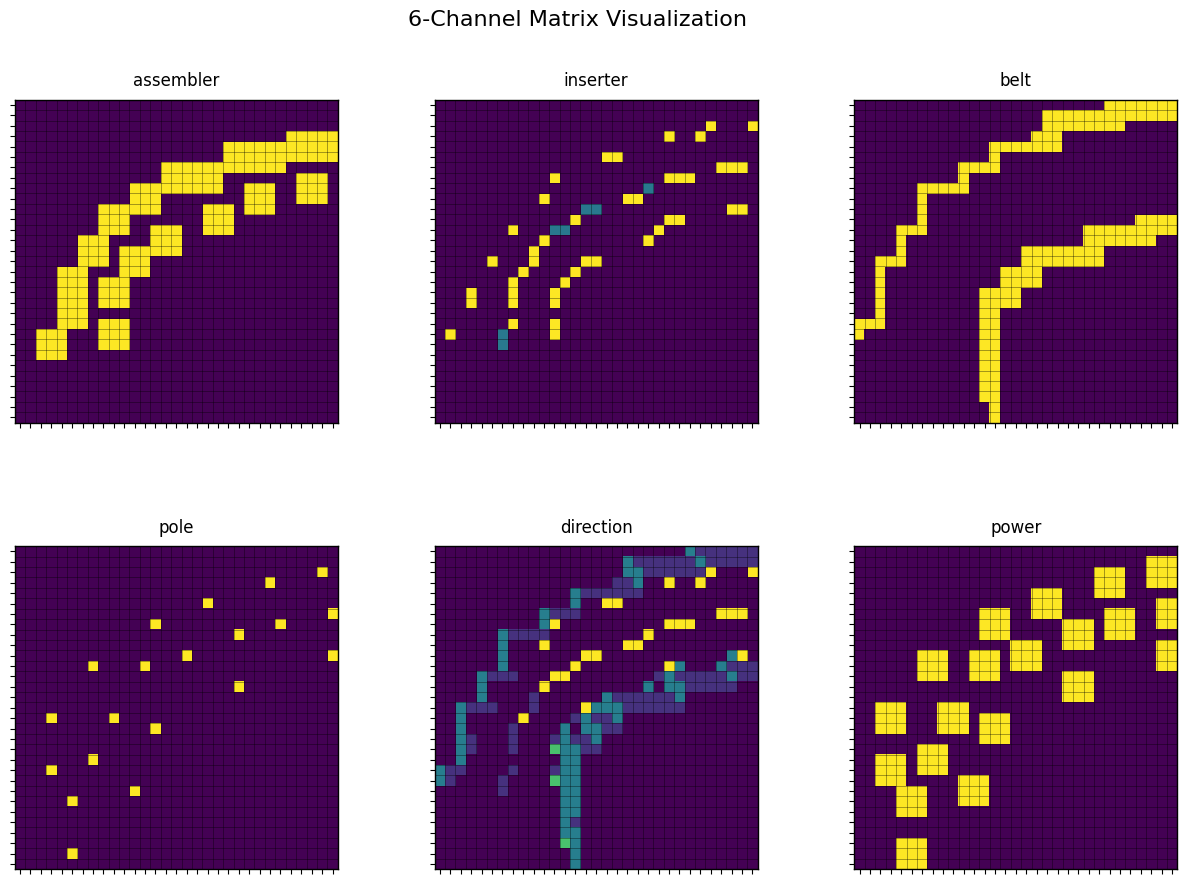

In [12]:
from src.visualization import visualize_multichannel_matrix

i = lll[2].get_matrix(dims=(30,30), repr_version=2)
fig = visualize_multichannel_matrix(i)

In [1]:
from src.pipeline import loaders
from src.syntheticdata import load_dataset

dd = load_dataset('av-redscience')
ml = loaders.MatrixLoader(dd, center=True)

/Users/david/src/nyu/factorio-working-group/src/visualization.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/david/src/nyu/factorio-working-group/src/visualization.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/david/src/nyu/factorio-working-group/src/visualization.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/david/src/nyu/factorio-working-group/src/visualization.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/david/src/nyu/factorio-working-group/src/visualization.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.

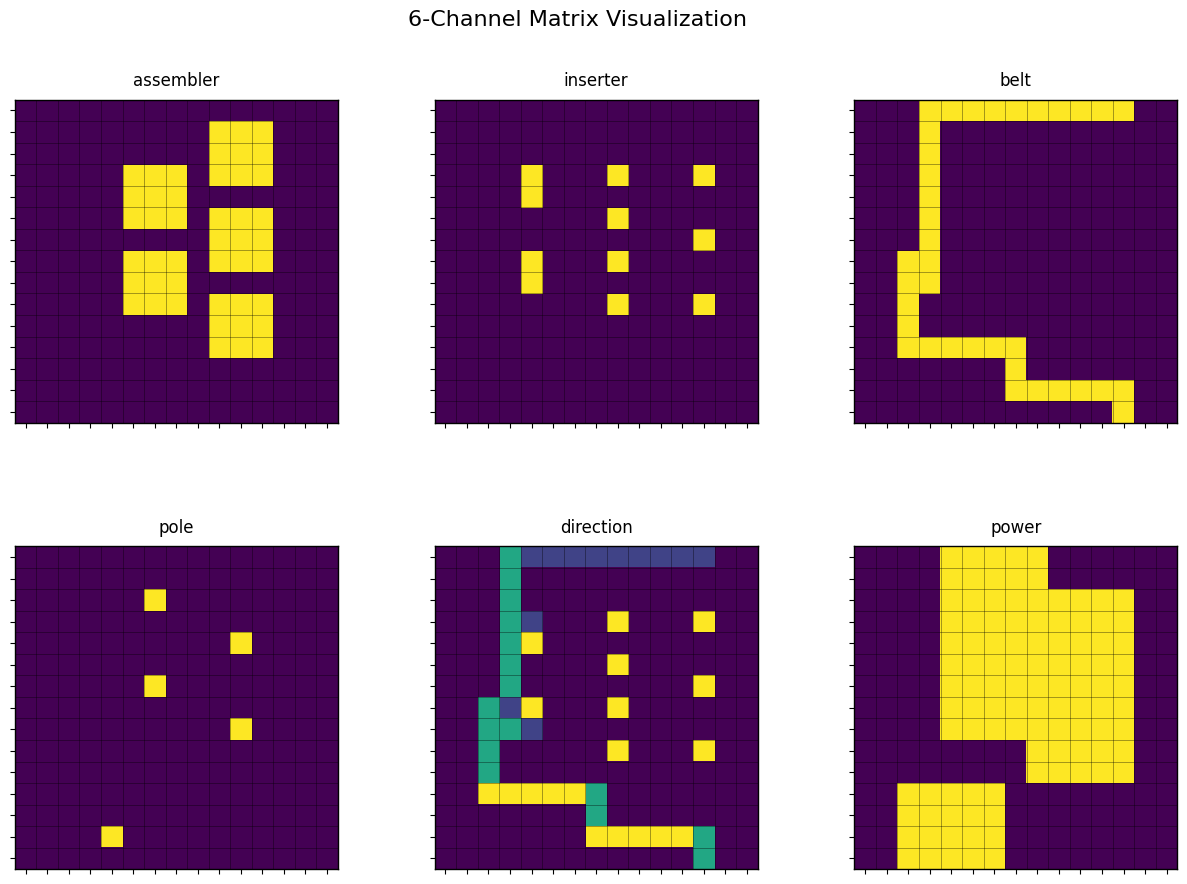

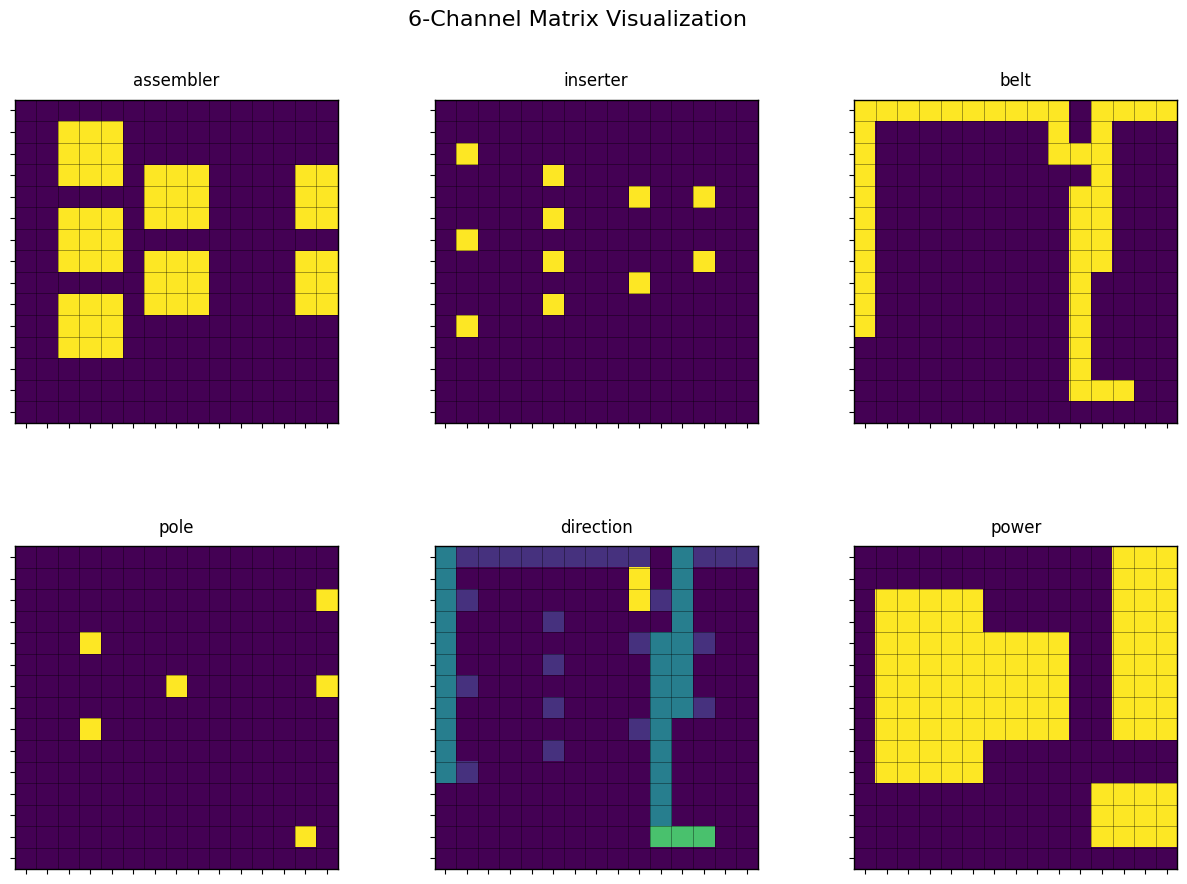

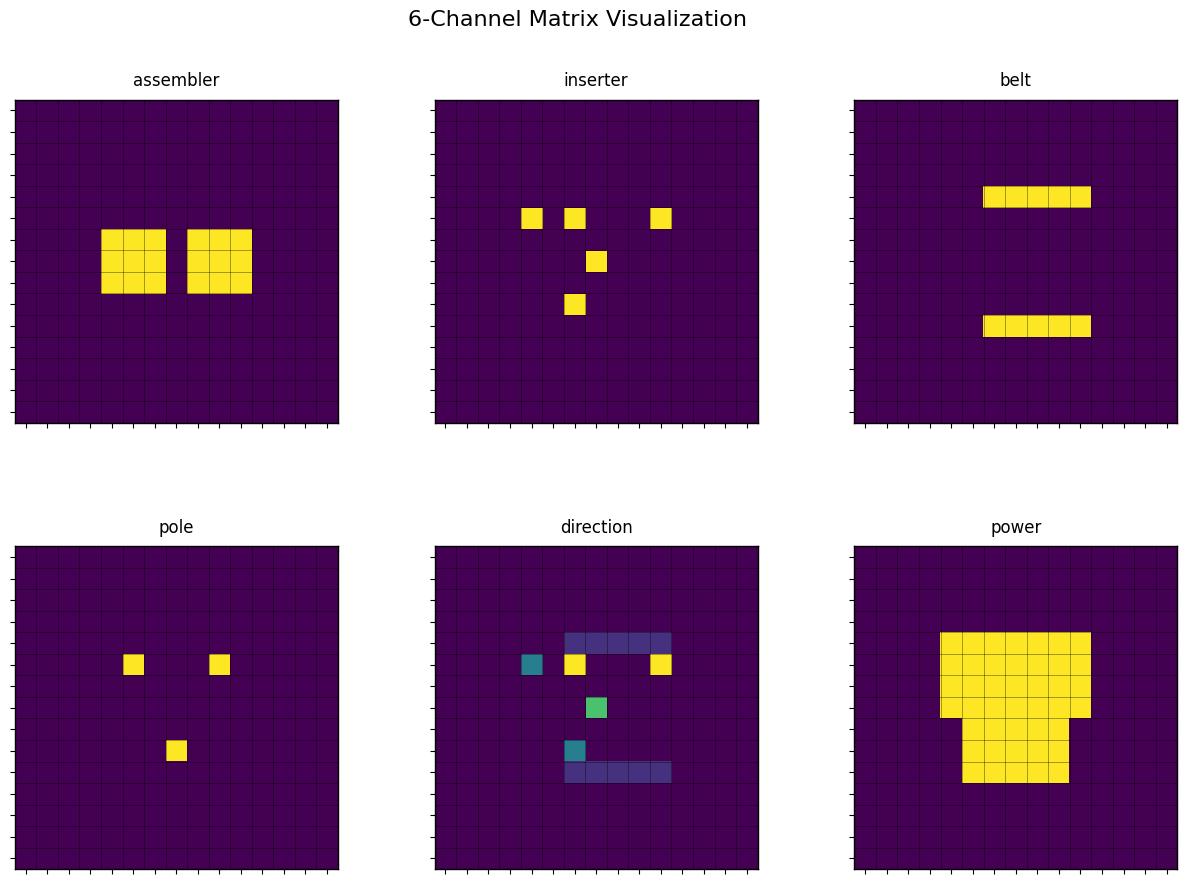

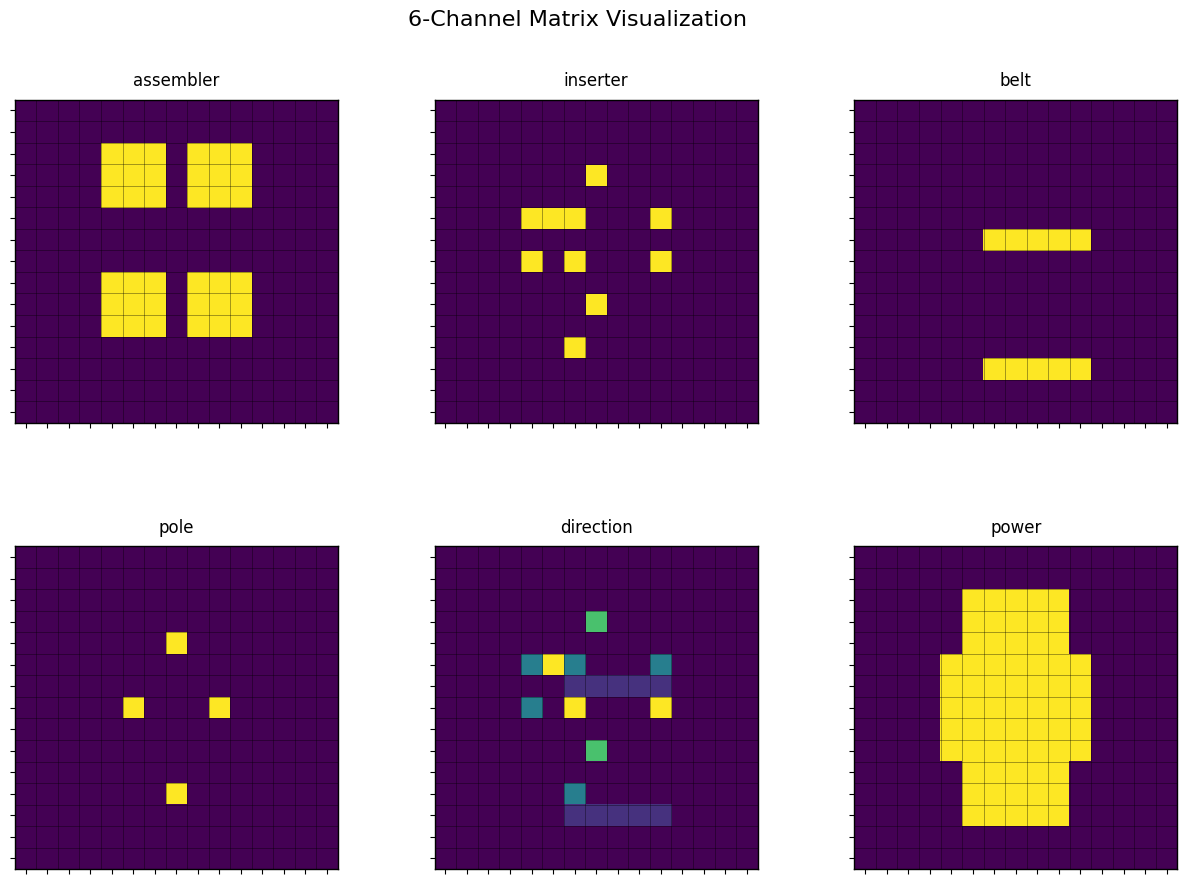

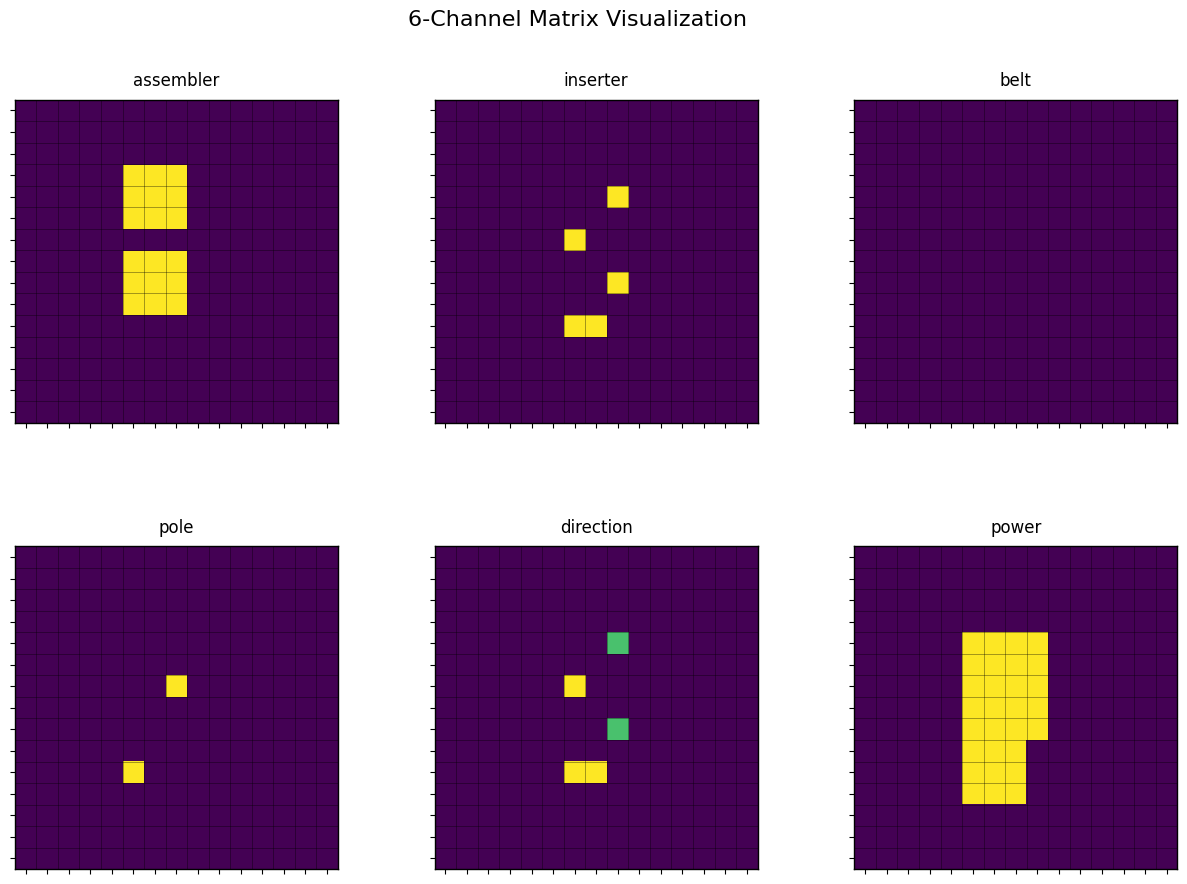

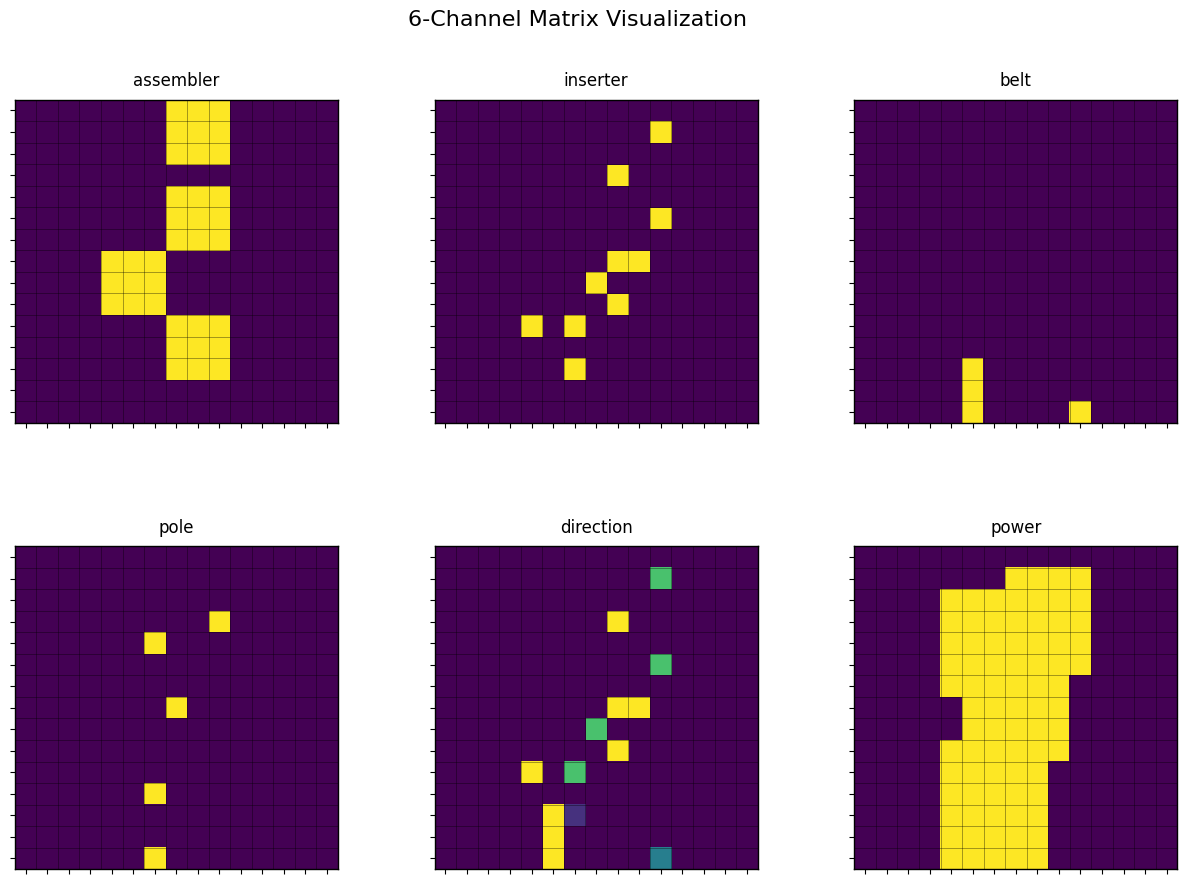

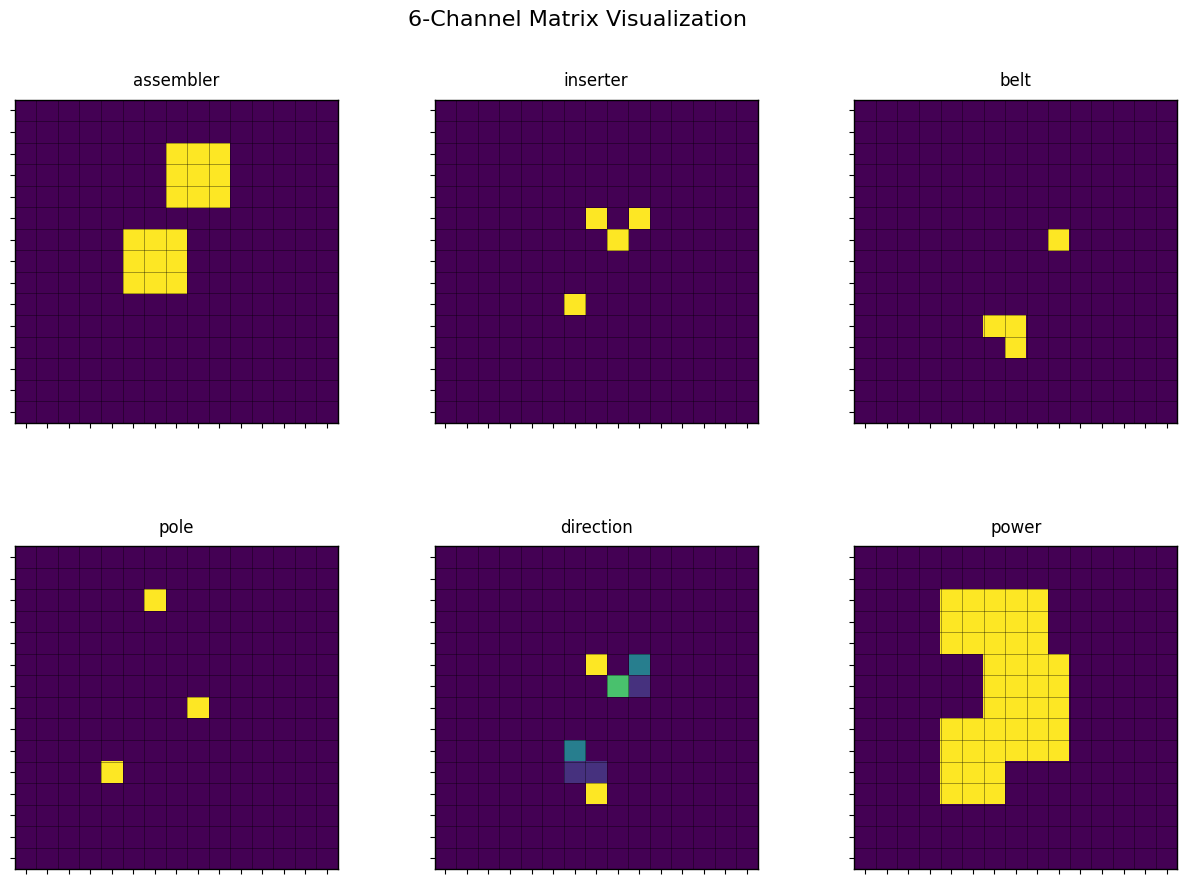

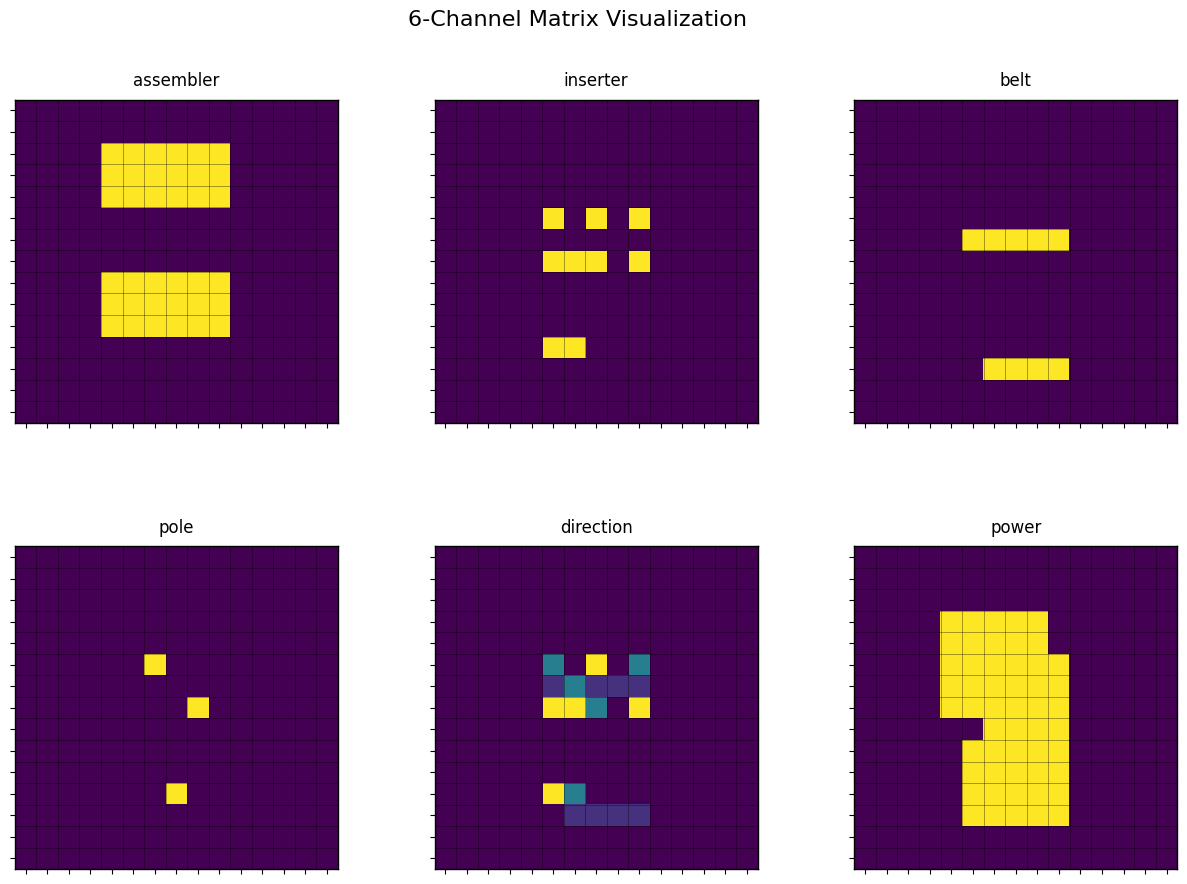

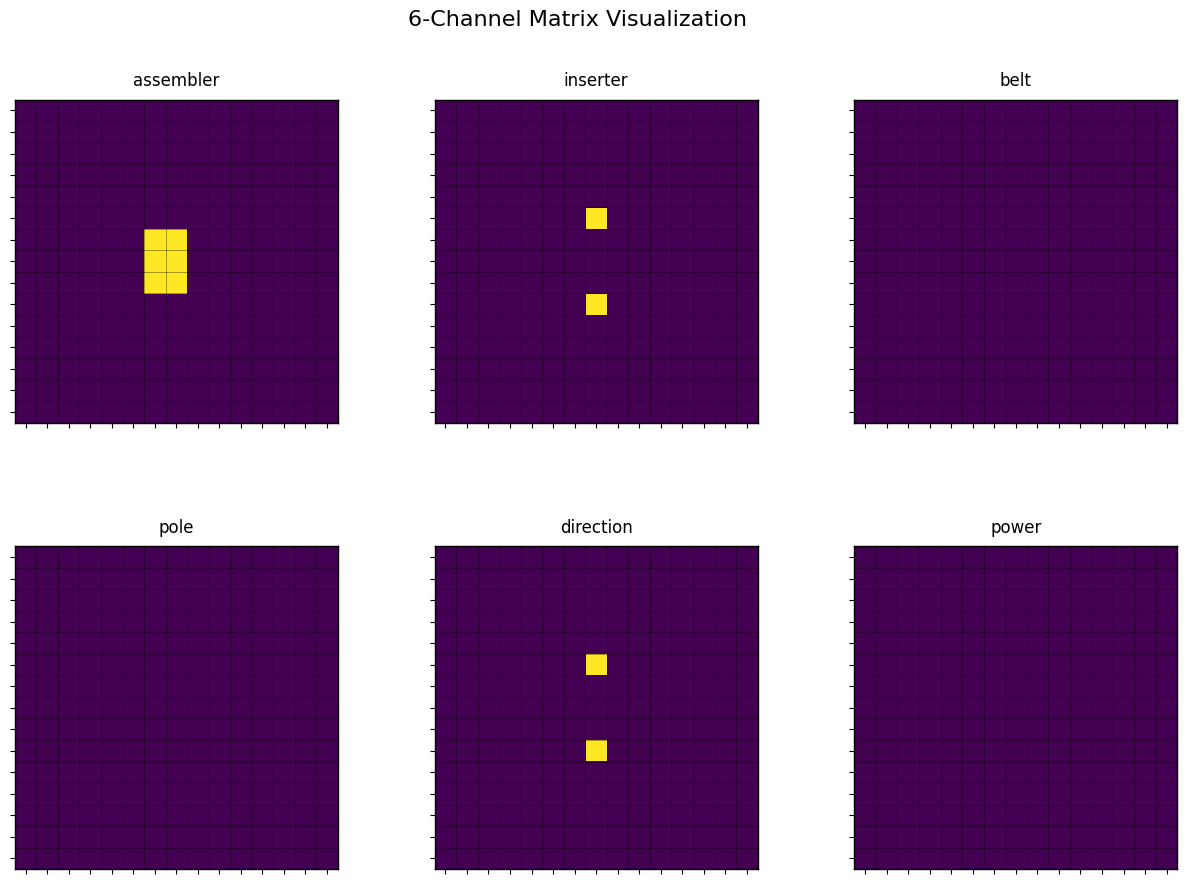

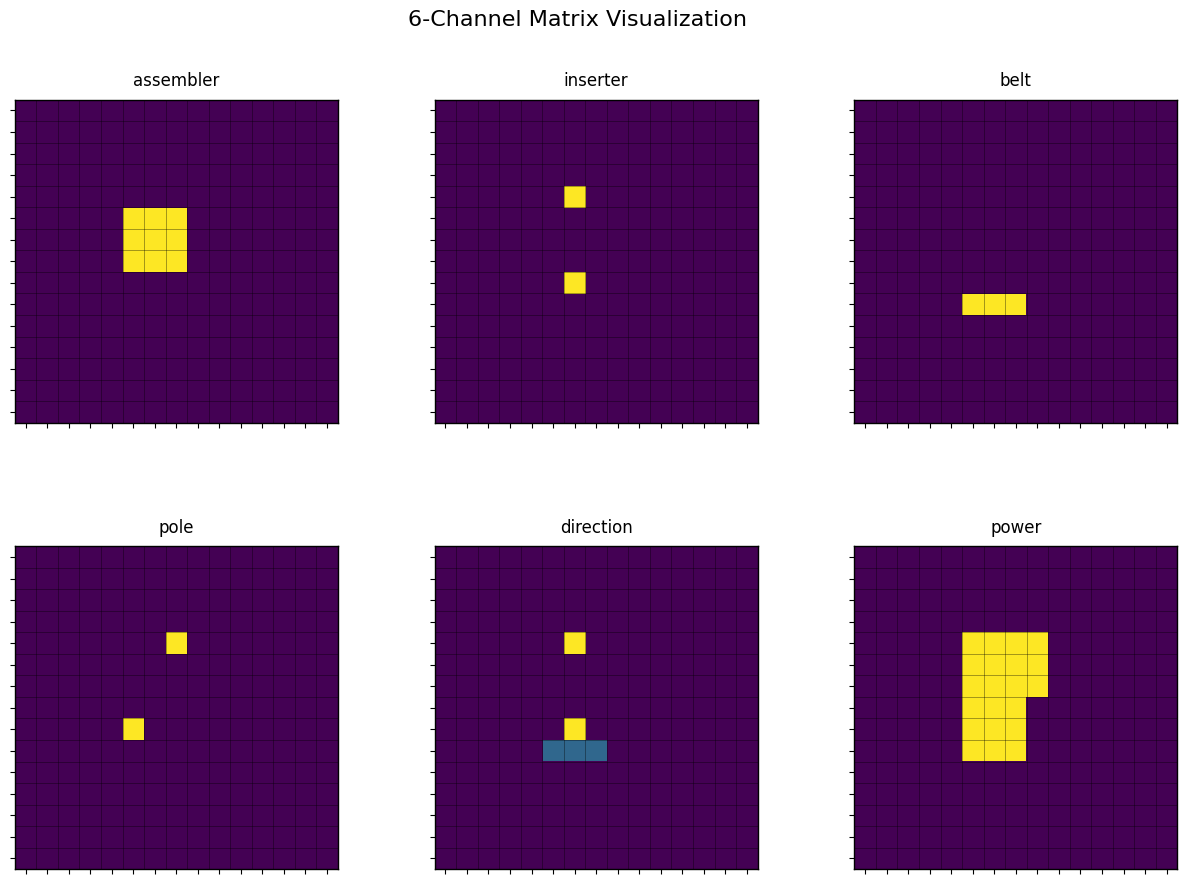

In [ ]:
from src.visualization import visualize_multichannel_matrix

for i in ml:
    visualize_multichannel_matrix(i)